# Machine Learning Final Project

## Problem Statement
Create a machine learning model which will help the company in determining the salary of newly hired employees using the given data.

## Q.1) Your views about the problem statement?
As machine learning models are able to make predictions faster and more accurately then manual methods, it can help company make effective data-driven decisions to determine employees salary using all the important factors like skills, experiance, qualification and past performance etc. This technique can help companies efficently predict salary packages which are fair and competitive accourding to the current market trends.

## Q.2) What will be your approach to solving this task?
My approach to solving this task:
1) Upload and analyze the data into jupyter notebook. 
2) Perform Data Pre-processing like cleaning data, transforming data. Handling missing values, outliers and categorical veriables.
3) Spliting the available data in 80:20 ration to perform training and testing of the models.
3) Training and testing the models using different regression techniques with available data.
4) Chosing the model and regression techique with best accuracy.
5) Steps to improve the selected model's performance. 

## Uploading Data

In [15]:
# importing importent libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
#uploading data into pandas dataset
df = pd.read_csv('C:/Users/AKSHAY TRIPATHI/OneDrive/Desktop/DATA SCIENCE/ML/Project/ML case Study.csv', header = 0)

In [17]:
# Looking at the available data
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [18]:
df.shape

(1589, 8)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


## Data Pre-processing

In [20]:
# Performing EDD for numerical variables
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


No missing values or visible outliers present in the data.

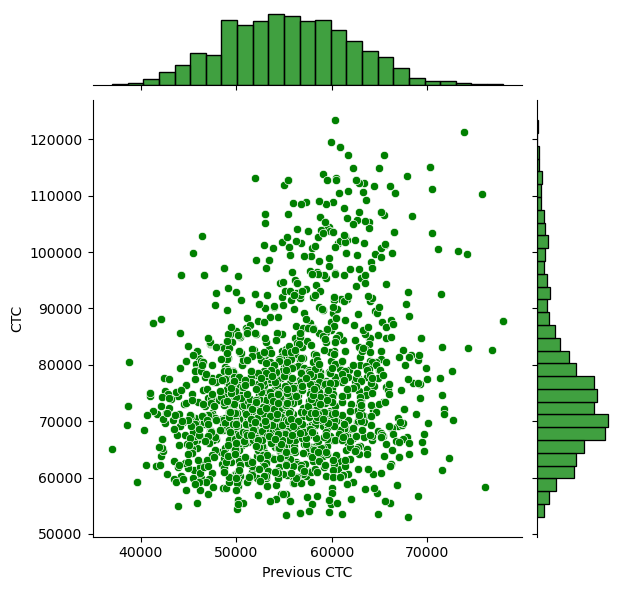

In [21]:
# Joint plot for previous ctc column
sns.jointplot(data=df, x='Previous CTC',y='CTC', color = 'green')

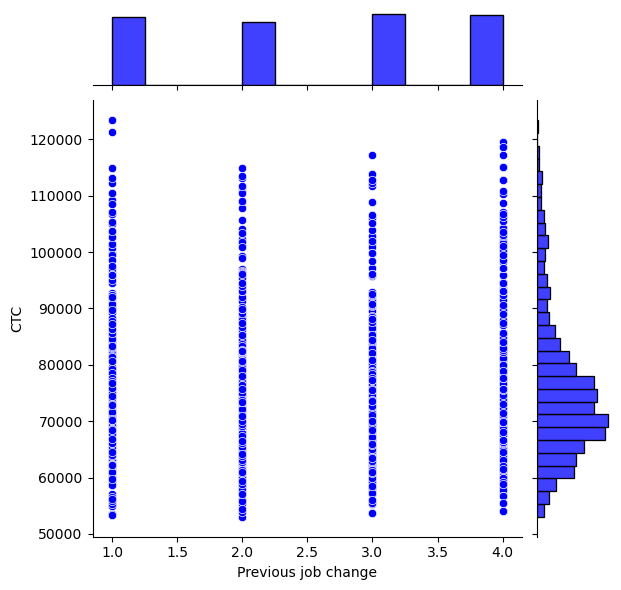

In [22]:
# Joint plot for Previous job change column
sns.jointplot(data=df, x='Previous job change',y='CTC', color = 'blue')

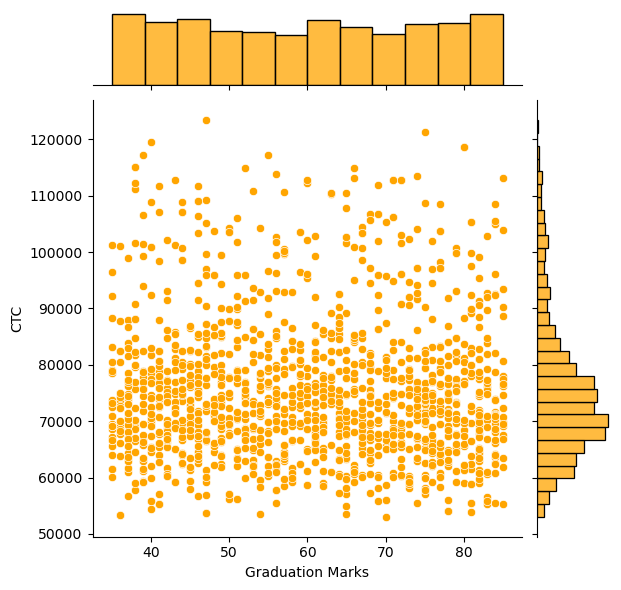

In [23]:
# Joint plot for Graduation Marks column
sns.jointplot(data=df, x='Graduation Marks',y='CTC', color = 'orange')

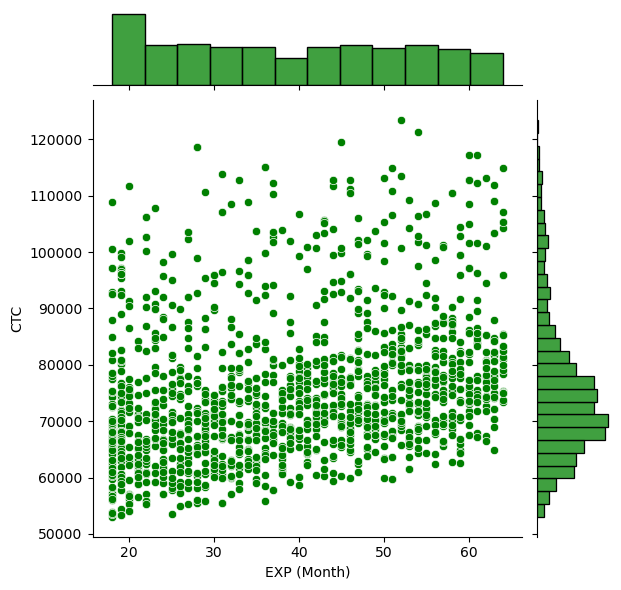

In [24]:
# Joint plot for EXP (Month) column
sns.jointplot(data=df, x='EXP (Month)',y='CTC', color = 'green')

No outliers visible in the above plots

<Axes: xlabel='Role', ylabel='count'>

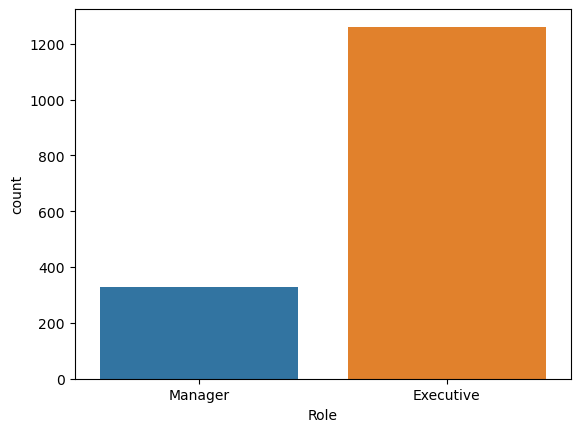

In [25]:
# for categorical veriables
sns.countplot(data=df, x='Role')

1) No missing values
2) No outliers present
3) Need to convert categorical variables into numerical variables for analysis

In [26]:
# Converting categorical variables into numerical variables for analysis
# uploading Colleges data sets
colleges = pd.read_csv('C:/Users/AKSHAY TRIPATHI/OneDrive/Desktop/DATA SCIENCE/ML/Project/Colleges.csv', header = 0)

In [27]:
# Creating college tier lists
Tier1 = colleges["Tier 1"].tolist()
Tier2 = colleges["Tier 2"].tolist()
Tier3 = colleges["Tier 3"].tolist()

In [28]:
Tier2

['IIIT Bangalore',
 'IIIT Delhi',
 'IGDTUW',
 'NIT Calicut',
 'IIITM Gwalior',
 'IIIT Lucknow',
 'MNNIT Allahabad',
 'Punjab Engineering College',
 'DAIICT',
 'MNIT Jaipur',
 'NIT Durgapur',
 'VNIT Nagpur',
 'LNMIIT',
 'BIT Mesra',
 'SVNIT Surat',
 'NIT Jalandhar',
 'NIT Jamshedpur',
 'NIT Kurukshetra',
 'NIT Patna',
 'NIT Raipur',
 'NIT Bhopal',
 'NIT Rourkela',
 'NIT Silchar',
 'NIT Sikkim',
 'IIIT Jabalpur',
 'Jalpaiguri Government Engineering College',
 'IIEST/BESU Shibpur',
 'R.V. College of Engineering']

In [15]:
Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [16]:
Tier3

['Ramaiah Institute of Technology, Bengaluru',
 'TIET/Thapar University',
 'Manipal Main Campus',
 'VIT Vellore',
 'SRM Main Campus',
 'KIIT, Bhubaneswar',
 'Amity University',
 'BMS College, Bangalore',
 'PES University, Bangalore',
 'USIT, Delhi',
 'MAIT, Delhi',
 'MSIT, Delhi',
 'Dayanand College of Engineering, Bangalore',
 'Heritage Institute of Technology, Kolkata',
 'IEM, Kolkata',
 'Techno India, Kolkata',
 'Jaypee, Noida',
 'Amrita University, Coimbatore',
 'Cummins College of Engineering for Women, Pune',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [29]:
# Removing Nan values from the lists.
Tier1 = [item for item in Tier1 if not(pd.isnull(item)) == True]
Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad']

In [30]:
# Removing Nan values from the lists
Tier2 = [item for item in Tier2 if not(pd.isnull(item)) == True]
Tier2

['IIIT Bangalore',
 'IIIT Delhi',
 'IGDTUW',
 'NIT Calicut',
 'IIITM Gwalior',
 'IIIT Lucknow',
 'MNNIT Allahabad',
 'Punjab Engineering College',
 'DAIICT',
 'MNIT Jaipur',
 'NIT Durgapur',
 'VNIT Nagpur',
 'LNMIIT',
 'BIT Mesra',
 'SVNIT Surat',
 'NIT Jalandhar',
 'NIT Jamshedpur',
 'NIT Kurukshetra',
 'NIT Patna',
 'NIT Raipur',
 'NIT Bhopal',
 'NIT Rourkela',
 'NIT Silchar',
 'NIT Sikkim',
 'IIIT Jabalpur',
 'Jalpaiguri Government Engineering College',
 'IIEST/BESU Shibpur',
 'R.V. College of Engineering']

In [31]:
# Converting college column into numerical values using tier list
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,1,inplace = True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace = True)  
    elif item in Tier3:
        df["College"].replace(item,3,inplace = True)    

In [32]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10


In [33]:
# Uploading Cities dataset
cities = pd.read_csv('C:/Users/AKSHAY TRIPATHI/OneDrive/Desktop/DATA SCIENCE/ML/Project/Cities.csv', header = 0)

In [34]:
cities

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode
5,Hyderabad,Rajpur Sonarpur
6,Ahmedabad,Kolhapur
7,Pune,Ajmer
8,Surat,NaN


In [35]:
# Creating city lists
Metro = cities["Metrio City"].tolist()
Non_metro = cities["non-metro cities"].tolist()


In [29]:
Metro

['Mumbai',
 'Delhi',
 'Kolkata',
 'Chennai',
 'Bangalore',
 'Hyderabad',
 'Ahmedabad',
 'Pune',
 'Surat']

In [30]:
Non_metro

['Dehradun',
 'Durgapur',
 'Asansol',
 'Rourkela',
 'Kozhikode',
 'Rajpur Sonarpur',
 'Kolhapur',
 'Ajmer',
 nan]

In [36]:
# Removing Nan values from the list
Non_metro = [item for item in Non_metro if not(pd.isnull(item)) == True]
Non_metro

['Dehradun',
 'Durgapur',
 'Asansol',
 'Rourkela',
 'Kozhikode',
 'Rajpur Sonarpur',
 'Kolhapur',
 'Ajmer']

In [37]:
# Converting college column into numerical values using tier list
for item in df.City:
    if item in Metro:
        df["City"].replace(item,0,inplace = True)
    elif item in Non_metro:
        df["City"].replace(item,1,inplace = True)  

In [38]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,1,Manager,55523.0,3,66,19,71406.58
1,2,1,Executive,57081.0,1,84,18,68005.87
2,3,1,Executive,60347.0,2,52,28,76764.02
3,3,1,Executive,49010.0,2,81,33,82092.39
4,1,1,Executive,57879.0,4,74,32,73878.10


In [39]:
# Creating dummy variable for role column using getdummies function
df = pd.get_dummies(df, columns = ['Role'], drop_first = True)

In [40]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,1,55523.0,3,66,19,71406.58,1
1,2,1,57081.0,1,84,18,68005.87,0
2,3,1,60347.0,2,52,28,76764.02,0
3,3,1,49010.0,2,81,33,82092.39,0
4,1,1,57879.0,4,74,32,73878.10,0


In [41]:
# Creating Correlatinal matrix
df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,0.014946,1.000000,-0.004644,-0.051670,0.018616,0.023613,0.020365,0.048671
Previous CTC,0.041979,-0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,-0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


## X-Y Split

In [42]:
# Creating X and Y variables for regression model
X = df.loc[:,df.columns != 'CTC']
X.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,1,55523.0,3,66,19,1
1,2,1,57081.0,1,84,18,0
2,3,1,60347.0,2,52,28,0
3,3,1,49010.0,2,81,33,0
4,1,1,57879.0,4,74,32,0


In [43]:
Y = df['CTC']
Y.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

## Multiple Linear Regression using Stats model

In [45]:
# importing model to use
import statsmodels.api as sm
# Training the model
X_cons=sm.add_constant(X)
lm_multi=sm.OLS(Y,X_cons).fit()

In [46]:
# Model Performance
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Thu, 14 Sep 2023   Prob (F-statistic):          4.70e-257
Time:                        21:58:51   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 3.88e+04   2190.177     17.716      0.000    3.45e+04    4.31e+04
College              -481.5147    258.382     -1.864      0.063    -988.321      25.292
City                 -380.8308    433.455     -0.879      0.380   -1231.039     469.377
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
Role_Manager         1.949e+04    534.694     36.446      0.000    1.84e+04    2.05e+04
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     5.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Performing Test Train Split

In [42]:
# importing train test split function from sklearn library
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0) #spliting data into 80:20 ratio

In [43]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


In [44]:
# importing linear Regression from sklearn library
from sklearn.linear_model import LinearRegression


## Performing linear regression on train data

In [45]:
lm_a=LinearRegression()
lm_a.fit(X_train,y_train)

LinearRegression()

### Predicting Values

In [46]:
y_test_a=lm_a.predict(X_test)

In [47]:
y_train_a=lm_a.predict(X_train)

### Model Performance

In [48]:
# Importing r2 score 
from sklearn.metrics import r2_score

In [49]:
r2_score(y_test,y_test_a)

0.5355989894790041

## Ridge Shrinkage Method

In [120]:
from sklearn import preprocessing # To standardize data
# Import the model we are using
from sklearn.linear_model import Ridge

In [121]:
# Creating scaler objects
scaler=preprocessing.StandardScaler().fit(X_train)
X_train_s=scaler.transform(X_train)
X_test_s=scaler.transform(X_test)

### Training the model

In [122]:
lm_r=Ridge(alpha=0.5)
lm_r.fit(X_train_s,y_train)

Ridge(alpha=0.5)

### Model Performance

In [123]:
r2_score(y_test,lm_r.predict(X_test_s))

0.5355848845406523

## Lasso Shrinkage Method

In [124]:
# Import the model we are using
from sklearn.linear_model import Lasso

### Training the model

In [125]:
lm_l=Ridge(alpha=0.4)
lm_l.fit(X_train_s,y_train)

Ridge(alpha=0.4)

### Model Performance

In [126]:
r2_score(y_test,lm_l.predict(X_test_s))

0.5355877164258337

## Simple Decision tree method

### Training Decision Tree

In [50]:
# Importing tree
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [51]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

### Predicting Values

In [52]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [54]:
y_test_pred

array([ 73242.49487805,  67137.92249315,  67137.92249315,  77249.90582677,
        73242.49487805,  87264.44514286,  70080.03361607,  73242.49487805,
        67137.92249315,  73242.49487805,  70080.03361607,  77249.90582677,
        95311.75026316,  77249.90582677,  73242.49487805, 104985.9661039 ,
        67137.92249315,  67137.92249315,  67137.92249315,  77249.90582677,
       104985.9661039 , 104985.9661039 ,  67137.92249315,  67137.92249315,
        70080.03361607,  67137.92249315,  77249.90582677, 104985.9661039 ,
        77249.90582677,  73242.49487805,  67137.92249315,  67137.92249315,
        77180.13443038,  77249.90582677, 104985.9661039 ,  77249.90582677,
        67137.92249315,  77180.13443038,  67137.92249315,  67137.92249315,
        67137.92249315,  77180.13443038,  73242.49487805,  67137.92249315,
        77249.90582677,  70080.03361607,  77180.13443038,  67137.92249315,
        67137.92249315,  73242.49487805,  95311.75026316,  77249.90582677,
       104985.9661039 ,  

### Model Performance

In [59]:
# importing mean_squared_error matrics
from sklearn.metrics import mean_squared_error

In [56]:
mean_squared_error(y_test, y_test_pred)

60424631.02613475

In [57]:
r2_score(y_train, y_train_pred)

0.6137194061789908

In [58]:
r2_score(y_test, y_test_pred)

0.5927831611924911

### Plotting Decision Tree

In [61]:
# Creating a dot file
dot_data = tree.export_graphviz(regtree, out_file = None, feature_names = X_train.columns, filled=True)

In [62]:
# importing image abd pydotplus to visualize the tree model
from IPython.display import Image
import pydotplus

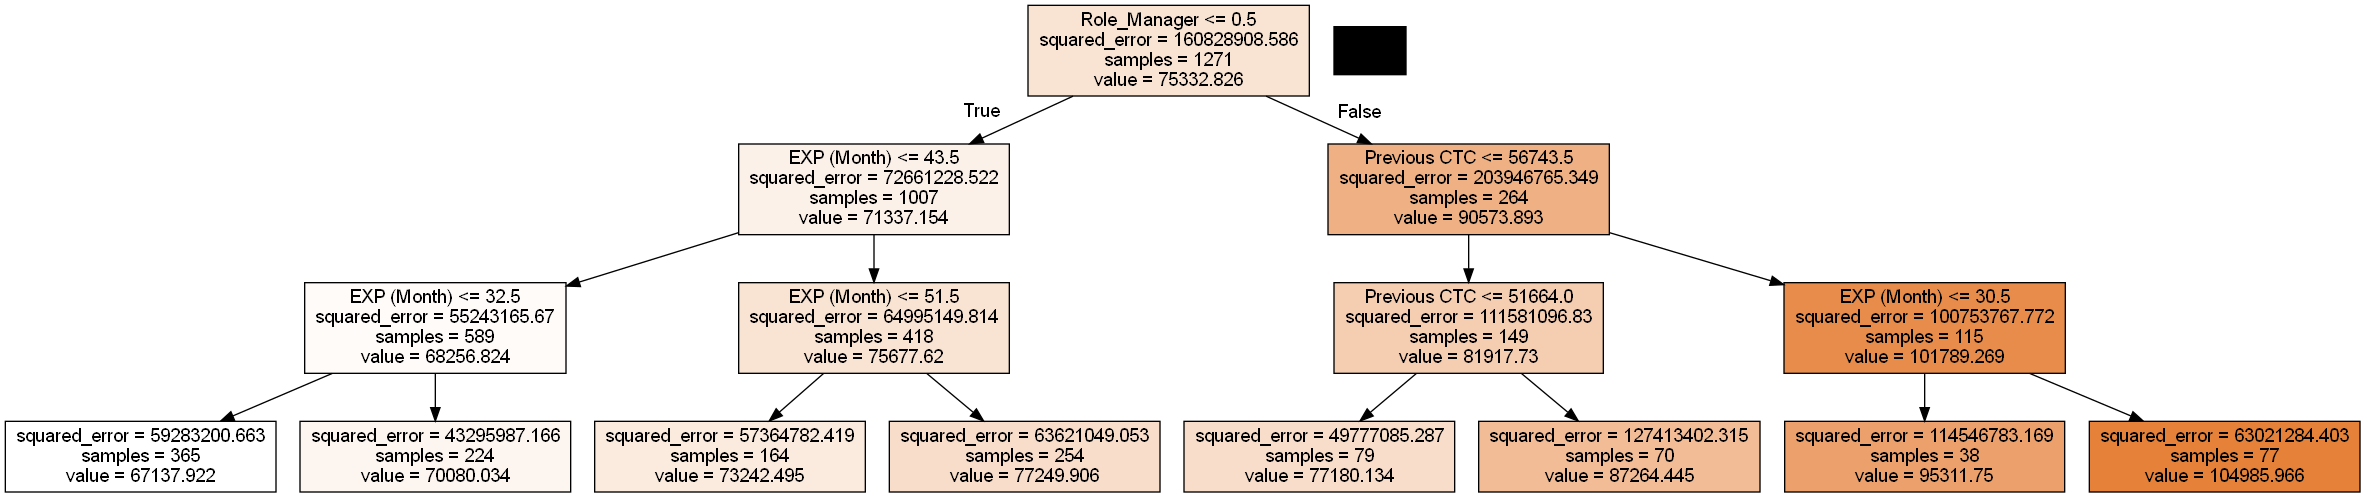

In [63]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Random Forest Regressor 

### Training Model

In [64]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000,n_jobs = -1, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

### Predicting Values

In [65]:
y_train_pred2 = rf.predict(X_train)
y_test_pred2 = rf.predict(X_test)

### Model Performance

In [66]:
mean_squared_error(y_test, y_test_pred2)

50426355.28312304

In [67]:
r2_score(y_train, y_train_pred2)

0.950702606475054

In [68]:
r2_score(y_test, y_test_pred2)

0.6601640648480558

## Ada Boosting

In [91]:
# Import the model we are using
from sklearn.ensemble import AdaBoostRegressor
# Instantiate model with 5000 decision trees
ada_reg = AdaBoostRegressor(n_estimators = 5000, random_state = 42)
# Train the model on training data
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=5000, random_state=42)

### Predicting Values

In [92]:
y_train_pred3 = ada_reg.predict(X_train)
y_test_pred3 = ada_reg.predict(X_test)

### Model Performance

In [93]:
mean_squared_error(y_test, y_test_pred3)

60707106.85940631

In [94]:
r2_score(y_train, y_train_pred3)

0.6199642435301522

In [95]:
r2_score(y_test, y_test_pred3)

0.5908794852591683

## Gradient Boosting

### Training Data

In [115]:
# Import the model we are using
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate model with 1000 decision trees
gbr_reg = GradientBoostingRegressor(n_estimators = 1000, max_depth = 4, min_samples_split = 5, learning_rate = 0.02, loss = "squared_error")
# Train the model on training data
gbr_reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=4, min_samples_split=5,
                          n_estimators=1000)

### Predicting Values

In [116]:
y_train_pred4 = gbr_reg.predict(X_train)
y_test_pred4 = gbr_reg.predict(X_test)

### Model Performance

In [117]:
mean_squared_error(y_test, y_test_pred4)

54100814.766863555

In [118]:
r2_score(y_train, y_train_pred4)

0.8692840608075864

In [119]:
r2_score(y_test, y_test_pred4)

0.6354009550055164

# Q.3) What were the available ML model options you had to perform this task?
The available ML model options were:
1. Standard Linear Regression
2. Ridge Shrinkage Method
3. Lasso Shrinkage Method
4. Simple Decision Tree Method
5. Random Forest Regressor
6. Ada Boosting
7. Gradient Boosting
8. Feature Selection Method

# Q.4) Which model’s performance is best and what could be the possible reason for that?
Random Forest Regressor model was the best model for this data with the highest r2 score of 0.66 for the test set.
The random forest regressor producess group of trees which are different from each other to get non correlated outcomes. It does this by using a subset of variables to get different split every time which results in large reduction in variance hence this could be the reason for the highest r2 score for this model. 


# Q.5) What steps can you take to improve this selected model’s performance even further?
To improve this Random Forest model performance further we can apply Grid Search using which we can provide different values for all the hyper parameter that could be considered for this model. We can provide hyper parameter values like n_estimater, max_features, min_sample_split etc in the form of dictionary to the model and then select the model with best r2 score. We can also use feature selection methods in which we use only those variable which are higly relevant to dependent variable.Finally collecting more relevant accurate data and applying it to the model will also help increase model performance.